This notebook plots circular dichroism (CD) experiments of non-structural protein 5A, domains 2 and 3 (NS5A-D2D3) in the presence and absence of the small molecule, 5-fluoroindole. Input data is in units of mdeg. All measurements were taken with a 0.1 mm pathlength cuvette. NS5A-D2D3 is 220 residues in length. Data should first be downloaded from Zenodo as detailed in ../README.md. Data in no_molecule/ are in the absence of 5-fluoroindole. The filename indicates the concentration of NS5A-D2D3. Data in with_molecule/  are in the presence of 5-fluoroindole. The filename indicates the concentration of both 5-fluoroindole and NS5A-D2D3. Samples with and without molecule in the 'with_molecule' directory are matched in DMSO content. Each file contains three technical replicates.

In [1]:
# Import useful things
%matplotlib inline
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import itertools

In [2]:
# Read in data, concentrations to dictionaries

# Read in data in the absence of 5-fluoroindole
data_dict_no_mol = {} # data dictionary
concs = {} # concentration dictionary
for filename in os.listdir('../Data/CD_data/no_molecule/'):
    if filename.endswith('uM.txt'):
        prefix = filename.split('uM.txt')[0]
        with open(f'../Data/CD_data/no_molecule/{filename}', 'r') as f:
            lines = f.readlines()
            data = np.zeros((len(lines), 4)) # initialize empty array
            for i, line in enumerate(lines):
                values = line.strip().split() # split line into individual values
                data[i] = [float(v) for v in values] # convert each value to float and add to array
            data_dict_no_mol[f'd_{prefix}'] = data
            concs[f'd_{prefix}'] = np.float(prefix)*10**-6 #put concs in uM
            
            
# Read in data to compare protein with and without 5-fluoroindole (matched DMSO)
data_dict_with_mol = {} # data dictionary
D2D3_conc = {}
FI5_conc = {}
for filename in os.listdir('../Data/CD_data/with_molecule/'):
    if filename.endswith('5FI.txt'):
        protconc = filename.split('uMD2D3_')[0]
        molconc  = filename.split('uMD2D3_')[1].split('uM5FI')[0]
        with open(f'../Data/CD_data/with_molecule/{filename}', 'r') as f:
            lines = f.readlines()
            data = np.zeros((len(lines), 4)) # initialize empty array
            for i, line in enumerate(lines):
                values = line.strip().split() # split line into individual values
                data[i] = [float(v) for v in values] # convert each value to float and add to array
            data_dict_with_mol[f'd2d3_{protconc}_mol_{molconc}'] = data
            D2D3_conc[f'd2d3_{protconc}_mol_{molconc}'] = protconc
            FI5_conc[f'd2d3_{protconc}_mol_{molconc}'] = molconc

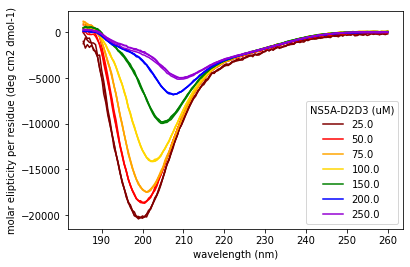

In [3]:
# Plot CD data of NS5A-D2D3 at increasing concentrations, in the absence of 5-fluoroindole
# Plot data in terms of molar elipticity per residue (there are 220 residues in D2D3)
fig = plt.figure()

buffer = np.mean(data_dict_no_mol['d_0'][:, 1:], axis=1) #calculate average buffer for baseline subtraction
sorted_keys = sorted(concs.keys(), key=lambda x: int(x.split('_')[1]))

colors = itertools.cycle(['maroon','red', 'orange', 'gold','green', 'blue', 'darkviolet'])

ax = fig.add_subplot(111)

for key in sorted_keys:
    if key != 'd_0':
        color = next(colors)
        ax.plot(data_dict_no_mol[key][:,0], (data_dict_no_mol[key][:,1]-buffer)/(220*1000*0.0001*concs[key]), label=np.round(10**6*concs[key]), color=color)
        ax.plot(data_dict_no_mol[key][:,0], (data_dict_no_mol[key][:,2]-buffer)/(220*1000*0.0001*concs[key]), color=color)
        ax.plot(data_dict_no_mol[key][:,0], (data_dict_no_mol[key][:,3]-buffer)/(220*1000*0.0001*concs[key]), color=color)
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('molar elipticity per residue (deg cm2 dmol-1)')
ax.legend(title='NS5A-D2D3 (uM)')

plt.show()

[NS5A-D2D3] = 25 uM


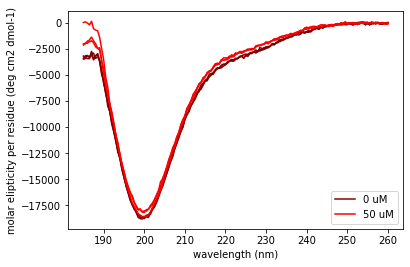

[NS5A-D2D3] = 75 uM


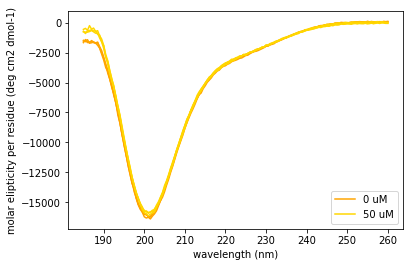

[NS5A-D2D3] = 200 uM


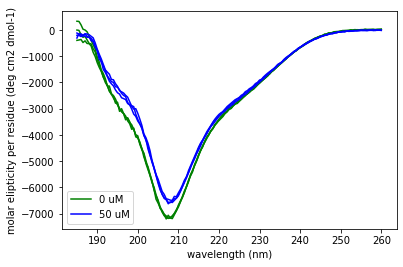

In [4]:
# Plot CD data of NS5A-D2D3 with and without 5-fluoroindole
concs_pro = set()
concs_mol = set()

for value in D2D3_conc.values(): #get unique d2d3 concs
    concs_pro.add(value)
    
for value in FI5_conc.values():  #get unique 5FI concs
    concs_mol.add(value)
    
buffer_no_mol = np.mean(data_dict_with_mol['d2d3_0_mol_0'][:, 1:], axis=1) #calculate average buffer for baseline subtraction in absence of mol
buffer_w_mol = np.mean(data_dict_with_mol['d2d3_0_mol_50'][:, 1:], axis=1) #calculate average buffer for baseline subtraction in absence of mol

sorted_keys = sorted(concs.keys(), key=lambda x: int(x.split('_')[1]))

pro_conc_sorted = sorted(np.array(list(concs_pro), dtype=int))

for d2d3_conc in pro_conc_sorted:
    
    if d2d3_conc != 0:
        fig = plt.figure()
        for fi5_conc in concs_mol:
            color = next(colors)
            if fi5_conc == '0': 
                print('[NS5A-D2D3] =', D2D3_conc[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'], 'uM')
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,1]-buffer_no_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color, label='0 uM')
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,2]-buffer_no_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color)
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,3]-buffer_no_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color)
            if fi5_conc == '50': 
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,1]-buffer_w_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color, label='50 uM')
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,2]-buffer_w_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color)
                plt.plot(data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,0], (data_dict_with_mol[f'd2d3_{d2d3_conc}_mol_{fi5_conc}'][:,3]-buffer_w_mol)/(220*1000*0.0001*d2d3_conc*10**-6), color=color)
            plt.legend()
            plt.xlabel('wavelength (nm)')
            plt.ylabel('molar elipticity per residue (deg cm2 dmol-1)')

    plt.show()
        